In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from plotting import plot_utils, summary_plots, load_fits, plot_prf_params, pycortex_plot_utils
plot_utils.set_all_font_sizes(12)
from utils import roi_utils, default_paths, stats_utils, nsd_utils

In [2]:
# Load results of the fitting procedure
subjects = np.arange(1,9)
n_subjects = len(subjects)

fitting_types = ['full_midlevel', 'all_coco_categ']

n_models = len(fitting_types)

outlist = []
for fi in range(n_models):
        
    out = [load_fits.load_fit_results(subject=ss, fitting_type=fitting_types[fi], \
                                      n_from_end=0, verbose=False) \
                                       for ss in subjects]
    outlist.append(out)
out = outlist

# initialize roi_def objects to get roi indices
roi_def = roi_utils.multi_subject_roi_def(subjects)
roi_names =roi_def.roi_names
n_rois = roi_def.n_rois

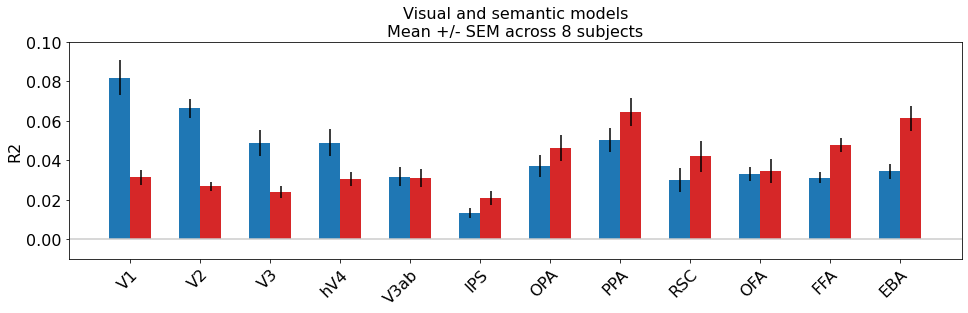

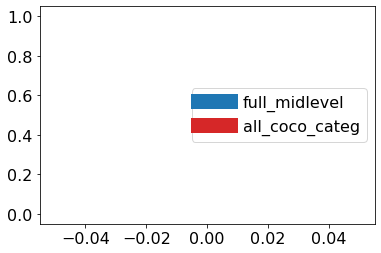

In [6]:
# plot mean performance each ROI

n_rois = roi_def.n_rois

nc_thresh = 0.01

fi2plot = [0,1]

model_colors = cm.tab10(np.linspace(0,1,4))[[0,1,3],:]
roi_mean_vals = np.zeros((n_rois, len(fi2plot), n_subjects))

for si in range(n_subjects):

    for fi, ff in enumerate(fi2plot):

        vals = out[ff][si]['val_r2'][:,0]
        nc = nsd_utils.ncsnr_to_nc(out[fi][si]['voxel_ncsnr'][out[fi][si]['voxel_mask']])/100
        inds2use = nc>nc_thresh
    
        for ri in range(n_rois):

            inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri) & inds2use

            roi_mean_vals[ri,fi,si] = np.mean(vals[inds_this_roi])

mean_vals = np.mean(roi_mean_vals, axis=2)
sem_vals = np.std(roi_mean_vals, axis=2)/np.sqrt(n_subjects)
  
legend_separate=True
title='Visual and semantic models\nMean +/- SEM across 8 subjects'

names = fitting_types

plot_utils.set_all_font_sizes(16)

plt.rcParams['pdf.fonttype']=42

fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=model_colors, \
                                space=0.2, \
                xticklabels=roi_names, ylabel='R2', \
                ylim=[-0.01, 0.10], title=title, horizontal_line_pos=0,\
                legend_labels=names, \
                legend_overlaid=False, legend_separate=True, \
                fig_size=(16,4))

fn2save = '/user_data/mmhender/imStat/figures/Vis_vs_semantic_R2.pdf'
plt.savefig(fn2save)